## Using Yahoo Finance

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 19.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0b78bb1ea1082dbe60525ae3a8cfc3af576e702cca93ea4ad82ee6e6eb895656
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
# Import modules
from datetime import datetime, timedelta
import pandas as pd

pd.core.common.is_list_like = pd.api.types.is_list_like #For solving import pandas_datareader issue
import numpy as np
import datetime
import csv
import requests
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Today = datetime.datetime.now().strftime ("%Y-%m-%d")

# Import list of stock names from NSE website
with requests.Session() as s:
    download = s.get('https://www1.nseindia.com/products/content/sec_bhavdata_full.csv')
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    stock_nse = pd.DataFrame(list(cr))
    
#View the top rows
stock_nse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,SYMBOL,SERIES,DATE1,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
1,20MICRONS,EQ,03-Sep-2021,53.85,54.45,54.85,53.15,53.55,53.60,53.79,53659,28.86,647,33348,62.15
2,21STCENMGM,EQ,03-Sep-2021,34.85,35.50,35.50,35.50,35.50,35.50,35.50,998,0.35,13,998,100.00
3,3MINDIA,EQ,03-Sep-2021,24543.05,24900.00,25000.00,24400.00,24600.00,24537.05,24799.79,4348,1078.29,1631,2632,60.53
4,3PLAND,BE,03-Sep-2021,14.00,14.70,14.70,13.30,14.05,14.05,14.26,13164,1.88,66,-,-


In [5]:
new_header = stock_nse.iloc[0] #grab the first row for the header; as they gives the name of stocks
stock_nse = stock_nse[1:] #take the data less the header row
stock_nse = stock_nse.rename(columns = new_header)
stock_nse.head()

,SYMBOL,SERIES,DATE1,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
1,20MICRONS,EQ,03-Sep-2021,53.85,54.45,54.85,53.15,53.55,53.60,53.79,53659,28.86,647,33348,62.15
2,21STCENMGM,EQ,03-Sep-2021,34.85,35.50,35.50,35.50,35.50,35.50,35.50,998,0.35,13,998,100.00
3,3MINDIA,EQ,03-Sep-2021,24543.05,24900.00,25000.00,24400.00,24600.00,24537.05,24799.79,4348,1078.29,1631,2632,60.53
4,3PLAND,BE,03-Sep-2021,14.00,14.70,14.70,13.30,14.05,14.05,14.26,13164,1.88,66,-,-
5,585GS2030,GS,03-Sep-2021,95.05,99.00,99.00,99.00,99.00,99.00,99.00,5,0.00,1,5,100.00


In [6]:
import yfinance as yf

In [65]:
# Get only the list of stock names - for next purpose: getting price based on date range
stock_nse['stock_name'] = stock_nse['SYMBOL'] + ".NS" #stock_nse['SYMBOL'].str.lower() # .BO for bombay stock exchange
stock_list = stock_nse['stock_name'].tolist()
stock_list = list(set(stock_list)) # Names of stock with "NSE/" as prefix
print(len(stock_list))

1945


In [51]:
data = []
for i in range(20):
  df = yf.download(str(stock_list[i])).reset_index()
  if df.empty: # if dataframe is empty
    continue
  df['stock_name'] = stock_list[i]
  data.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 585GS2030.NS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 618GS2024.NS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 664GS2035.NS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 667GS2050.NS: No data found, symbol may be delisted
[*************

In [52]:
len(data) #out of 20 stock, only 19 were available

10

In [53]:
# stock prices for THEMISMED
data[0].head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_name
0,2008-10-06,40.00,40.00,15.800,16.775,14.731861,23501600,20MICRONS.NS
1,2008-10-07,16.00,19.00,13.925,15.025,13.195004,9113400,20MICRONS.NS
2,2008-10-08,14.00,14.60,12.550,13.250,11.636194,2464384,20MICRONS.NS
3,2008-10-10,12.45,12.45,10.825,11.600,10.187157,1207928,20MICRONS.NS
4,2008-10-13,12.15,13.30,11.650,12.325,10.823853,898692,20MICRONS.NS


In [54]:
themismed_stocks = data[0].copy()
themismed_stocks.Date = pd.to_datetime(themismed_stocks.Date)
themismed_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3173 non-null   datetime64[ns]
 1   Open        3173 non-null   float64       
 2   High        3173 non-null   float64       
 3   Low         3173 non-null   float64       
 4   Close       3173 non-null   float64       
 5   Adj Close   3173 non-null   float64       
 6   Volume      3173 non-null   int64         
 7   stock_name  3173 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 198.4+ KB


In [55]:
# unique years for which data downloaded
np.unique(pd.DatetimeIndex(themismed_stocks.Date).year)

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [56]:
themismed_stocks.set_index('Date', inplace=True)
themismed_stocks.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'stock_name'], dtype='object')

In [57]:
themismed_stocks.drop(labels=['Open',	'High',	'Low',	'Adj Close',	'Volume',	'stock_name'], axis=1, inplace=True)

In [58]:
themismed_stocks.head()

,Close
Date,
2008-10-06,16.775
2008-10-07,15.025
2008-10-08,13.250
2008-10-10,11.600
2008-10-13,12.325


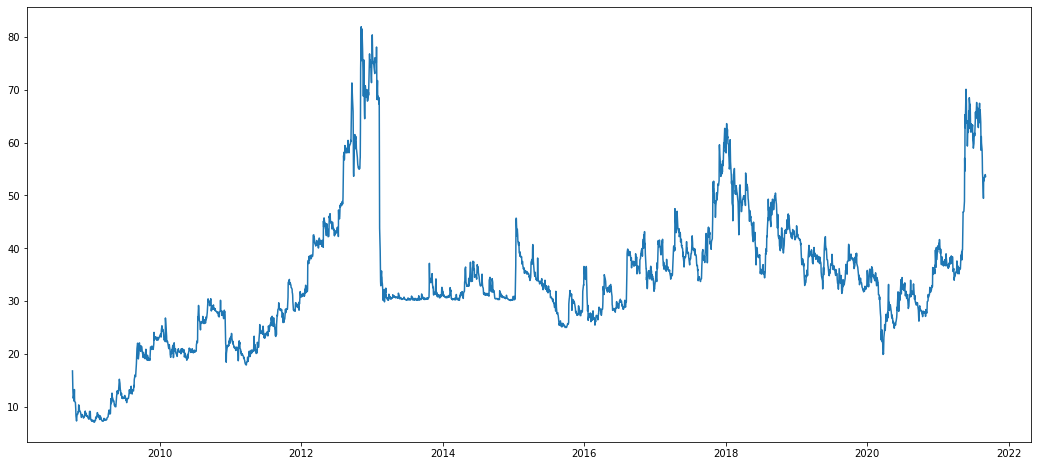

In [59]:
plt.figure(figsize=(18,8))
plt.plot(themismed_stocks)

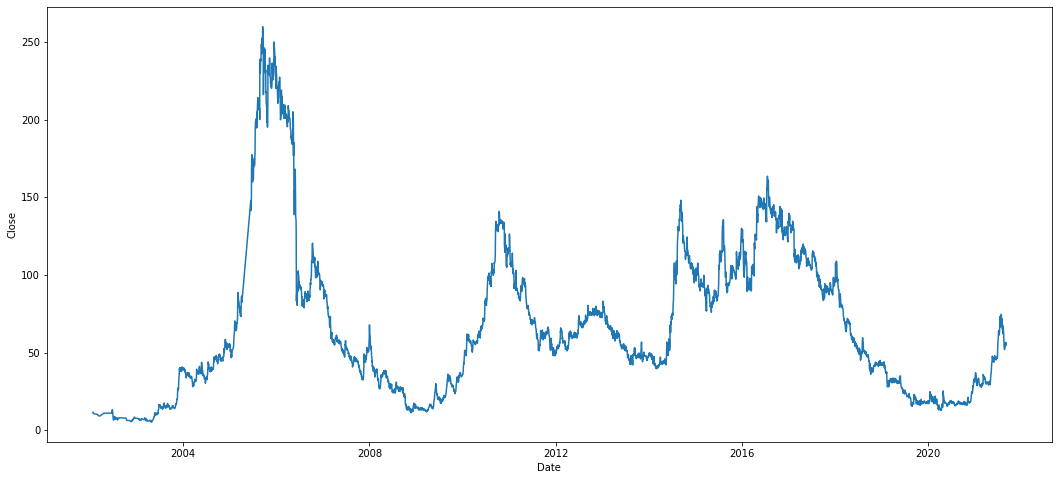

In [16]:
plt.figure(figsize=(18,8))
sns.lineplot(x=themismed_stocks.index, y = themismed_stocks.Close , data= themismed_stocks, markers=True)

## [Plotly interactive plot]("https://plotly.com/python/time-series/")

In [17]:
# Using plotly.express 
import plotly.express as px

# df = px.data.stocks()
fig = px.line(themismed_stocks, x=themismed_stocks.index, y=themismed_stocks.Close, title="Stock prices of themismed")
fig.show()

#### Concatenating all the stocks together in a single dataframe

In [ ]:
!pip install dash

In [81]:
# data = []
# for i in range(20):
#   df = yf.download(str(stock_list[i])).reset_index()
#   if df.empty: # if dataframe is empty
#     continue
#   df['stock_name'] = stock_list[i]
#   data.append(df)

# downloading all stocks
# stock_list.sort()

stock_df = yf.download(str(stock_list[0])).reset_index()
stock_df['stock_name'] = stock_list[0]

for i in range(1,10):
  temp_df = yf.download(str(stock_list[i])).reset_index()
  
  # if failed to download, continue to next stock
  if temp_df.empty:
    continue

  temp_df['stock_name'] = stock_list[i]
  stock_df = pd.concat([stock_df, temp_df])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MITCON.NS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [75]:
stock_df.stock_name.unique()

array(['ICICINF100.NS', 'EXPLEOSOL.NS', 'GET&D.NS', 'IEX.NS',
       'TIRUPATIFL.NS', 'KEERTI.NS', 'LPDC.NS', 'RAYMOND.NS', 'MAXVIL.NS',
       'TATACHEM.NS', 'KNRCON.NS', 'INDOTECH.NS', 'DIAMONDYD.NS',
       'JINDALPOLY.NS', 'TGBHOTELS.NS', 'JASH.NS', 'NDGL.NS',
       'CYBERMEDIA.NS', 'PUNJLLOYD.NS', 'SALONA.NS', 'NITCO.NS',
       'AGCNET.NS', 'LIBAS.NS', 'IVZINGOLD.NS', 'XELPMOC.NS', 'VSSL.NS',
       'DBREALTY.NS', 'SWARAJENG.NS', 'APCOTEXIND.NS', 'GENCON.NS',
       'GRAVITA.NS', 'FLUOROCHEM.NS', 'SPENTEX.NS', 'MOL.NS',
       'THOMASCOTT.NS', 'JITFINFRA.NS', 'TTKHLTCARE.NS', 'HILTON.NS',
       'BAFNAPH.NS', 'LAOPALA.NS', 'ADANITRANS.NS', 'MHRIL.NS',
       'POLYCAB.NS', 'RELINFRA.NS', 'DAMODARIND.NS', 'PGHL.NS',
       'APTECHT.NS', 'CANDC.NS', 'APTUS.NS', 'GOLDSHARE.NS', 'HMVL.NS',
       'ANDHRAPAP.NS', 'WESTLIFE.NS', 'VIMTALABS.NS', 'SUNFLAG.NS',
       'JUBLINGREA.NS', 'INDTERRAIN.NS', 'SOLARINDS.NS', 'SERVOTECH.NS',
       'MAHABANK.NS', 'VISHWARAJ.NS', 'SAGCEM.NS', 'DMAR

In [76]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_name
0,2013-08-21,52.007999,52.007999,52.007999,52.007999,52.007999,0.0,ICICINF100.NS
1,2013-08-22,52.963100,52.963100,52.963100,52.963100,52.963100,0.0,ICICINF100.NS
2,2013-08-23,53.593899,53.593899,53.593899,53.593899,53.593899,0.0,ICICINF100.NS
3,2013-08-26,53.672100,53.672100,53.672100,53.672100,53.672100,0.0,ICICINF100.NS
4,2013-08-27,52.549999,52.549999,52.549999,52.549999,52.549999,44057.0,ICICINF100.NS


In [82]:
# converting Date column to datetime
stock_df['Date'] = pd.to_datetime(stock_df.Date)

In [83]:
# unique years for which stocks have been downloaded

np.unique(pd.DatetimeIndex(stock_df.Date).year)

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

In [79]:
# Using plotly.express 
import plotly.express as px

# keep changing the stock name
fig = px.line(stock_df.loc[stock_df['stock_name'] == 'ICICINF100.NS'], x=stock_df.loc[stock_df['stock_name'] == 'ICICINF100.NS'].Date,
              y="Close", title="Stock prices")
fig.show()

In [84]:
# Using plotly.express 
import plotly.express as px

# keep changing the stock name
fig = px.line(stock_df, x="Date", 
              y="Close", color = 'stock_name', title="Stock prices")
fig.show()

In [24]:
stock_df.Date = pd.to_datetime(stock_df.Date)
stock_df.set_index('Date', inplace=True)

In [25]:
stock_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'stock_name'], dtype='object')

In [26]:
stock_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [27]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px #for visualization

# df = px.data.stocks() ---> here we will use stock_df

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id="Stocks",
        options=[{"label": x, "value": x} 
                 for x in stock_df.stock_name.unique()],
        value=stock_df.columns[0],
        clearable=False,
    ),
    dcc.Graph(id="stock-time-series-chart"),
])

@app.callback(
    Output("stock-time-series-chart", "figure"), 
    [Input("Stocks", "value")])
def display_time_series(ticker):
    fig = px.line(stock_df, x=stock_df.index, y=stock_df.Close)
    return fig

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
!pip install dash_bootstrap_components

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd

In [ ]:
# to check the running status
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div()

if __name__ == '__main__':
    app.run_server(port='8083')